In [22]:
library(ggplot2)
library(dplyr)
library(plotly)
library(e1071)
library(tidyr)
library(ggcorrplot)
library(stats)
library(psych)
library(reshape2)

data <- read.csv("/kaggle/input/car-sales/Car_sales.csv")

summary(data)

 Manufacturer          Model           Sales_in_thousands X__year_resale_value
 Length:157         Length:157         Min.   :  0.11     Min.   : 5.16       
 Class :character   Class :character   1st Qu.: 14.11     1st Qu.:11.26       
 Mode  :character   Mode  :character   Median : 29.45     Median :14.18       
                                       Mean   : 53.00     Mean   :18.07       
                                       3rd Qu.: 67.96     3rd Qu.:19.88       
                                       Max.   :540.56     Max.   :67.55       
                                                          NA's   :36          
 Vehicle_type       Price_in_thousands  Engine_size      Horsepower   
 Length:157         Min.   : 9.235     Min.   :1.000   Min.   : 55.0  
 Class :character   1st Qu.:18.017     1st Qu.:2.300   1st Qu.:149.5  
 Mode  :character   Median :22.799     Median :3.000   Median :177.5  
                    Mean   :27.391     Mean   :3.061   Mean   :185.9  
             

In [23]:
head(data)

print(dim(data))

Manufacturer Model   Sales_in_thousands X__year_resale_value Vehicle_type
1 Acura        Integra 16.919             16.360               Passenger   
2 Acura        TL      39.384             19.875               Passenger   
3 Acura        CL      14.114             18.225               Passenger   
4 Acura        RL       8.588             29.725               Passenger   
5 Audi         A4      20.397             22.255               Passenger   
6 Audi         A6      18.780             23.555               Passenger   
  Price_in_thousands Engine_size Horsepower Wheelbase Width Length Curb_weight
1 21.50              1.8         140        101.2     67.3  172.4  2.639      
2 28.40              3.2         225        108.1     70.3  192.9  3.517      
3    NA              3.2         225        106.9     70.6  192.0  3.470      
4 42.00              3.5         210        114.6     71.4  196.6  3.850      
5 23.99              1.8         150        102.6     68.2  178.0  2.998      
6 33.95              2.8         200        108.7     76.1  192.0  3.561      
  Fuel_capacity Fuel_efficiency Latest_Launch Power_perf_factor
1 13.2          28              2/2/2012      58.28015         
2 17.2          25              6/3/2011      91.37078         
3 17.2          26              1/4/2012            NA         
4 18.0          22              3/10/2011     91.38978         
5 16.4          27              10/8/2011     62.77764         
6 18.5          22              8/9/2011      84.56511

[1] 157  16


In [3]:
colnames(data)

[1] "Manufacturer"         "Model"                "Sales_in_thousands"  
 [4] "X__year_resale_value" "Vehicle_type"         "Price_in_thousands"  
 [7] "Engine_size"          "Horsepower"           "Wheelbase"           
[10] "Width"                "Length"               "Curb_weight"         
[13] "Fuel_capacity"        "Fuel_efficiency"      "Latest_Launch"       
[16] "Power_perf_factor"

In [4]:
print(colSums(is.na(data))) 

        Manufacturer                Model   Sales_in_thousands 
                   0                    0                    0 
X__year_resale_value         Vehicle_type   Price_in_thousands 
                  36                    0                    2 
         Engine_size           Horsepower            Wheelbase 
                   1                    1                    1 
               Width               Length          Curb_weight 
                   1                    1                    2 
       Fuel_capacity      Fuel_efficiency        Latest_Launch 
                   1                    3                    0 
   Power_perf_factor 
                   2 


In [5]:
data <- na.omit(data)
print(dim(data))

[1] 117  16


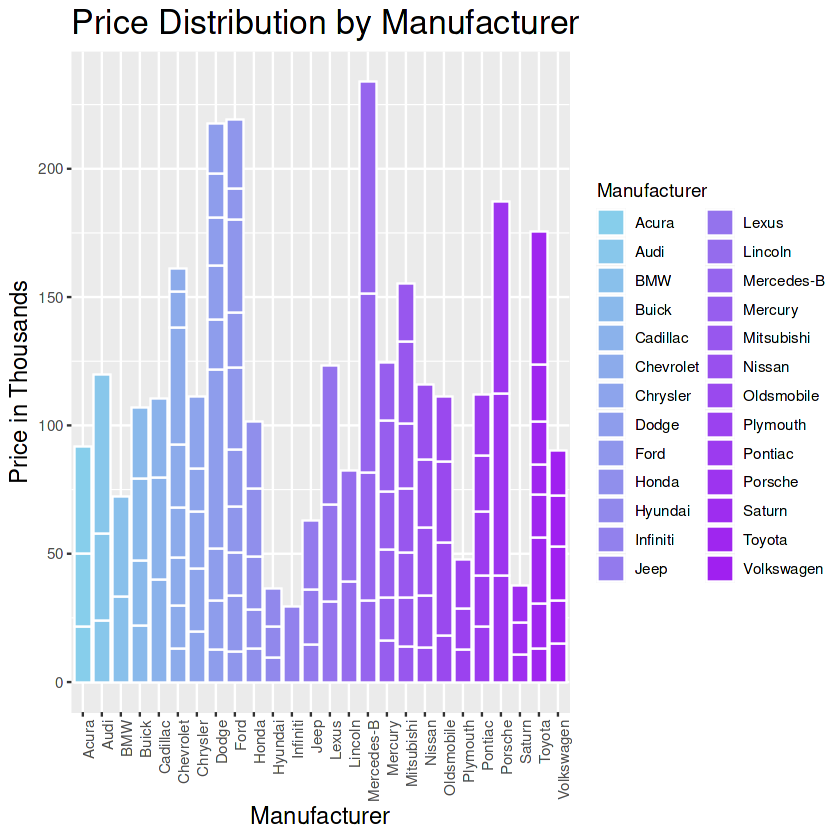

In [6]:
plot_data <- data[, c("Manufacturer", "Price_in_thousands")]

plt <- ggplot(data = plot_data, aes(x = Manufacturer, y = Price_in_thousands, fill = Manufacturer)) +
  geom_bar(stat = "identity", color = "white") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  ggtitle("Price Distribution by Manufacturer") +
  xlab("Manufacturer") +
  ylab("Price in Thousands") +
  theme(plot.title = element_text(size = 20)) +
  theme(axis.title = element_text(size = 14)) +
  scale_fill_manual(values = colorRampPalette(colors = c("skyblue", "purple"))(length(unique(plot_data$Manufacturer))))


plt

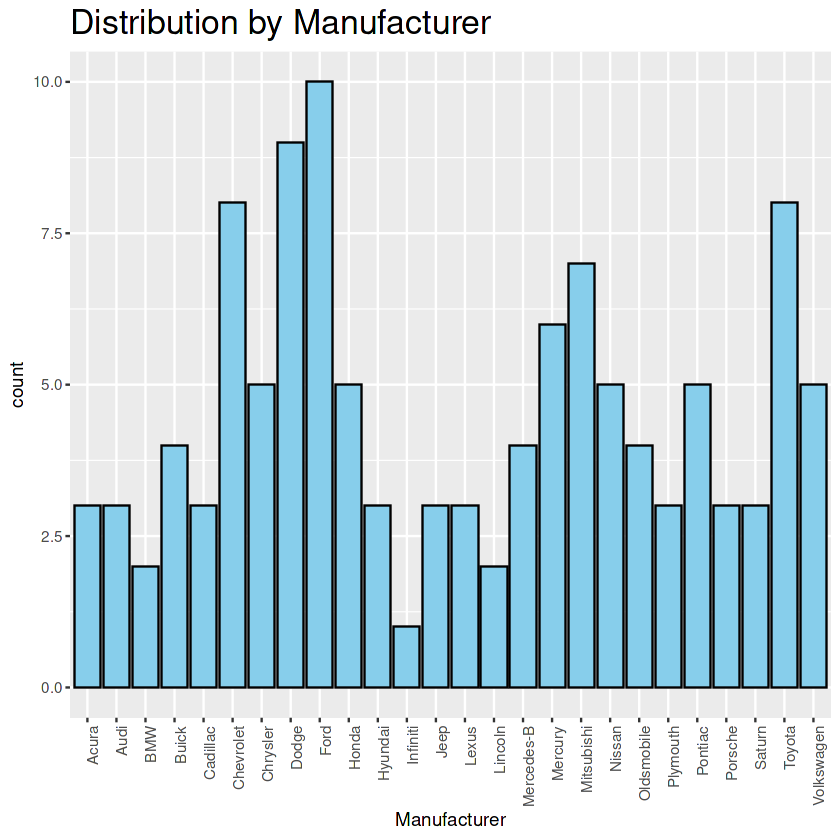

In [7]:
plt <- ggplot(data=data, aes(x=Manufacturer)) +
        geom_bar(fill="skyblue", color="black") +
        theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
        ggtitle("Distribution by Manufacturer") +
        theme(plot.title = element_text(size = 20))

plt

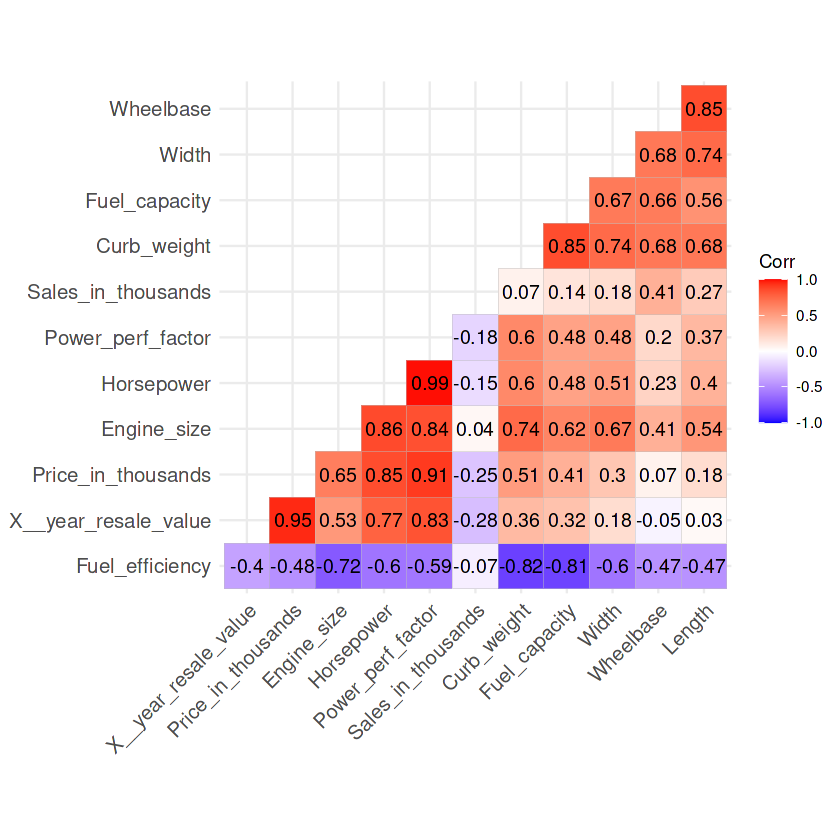

In [8]:
data_num <- data %>% select_if(is.numeric)

corr <- cor(data_num)

ggcorrplot(corr, hc.order = TRUE, type = "lower", lab = TRUE)

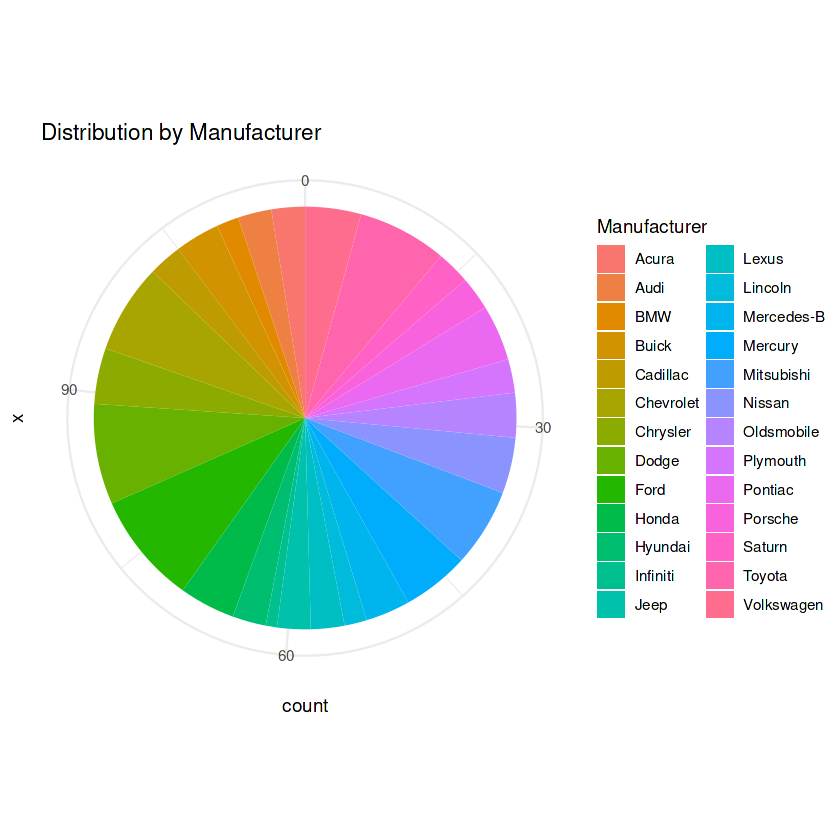

In [9]:
plt <- ggplot(data=data) +
  geom_bar(aes(x="", fill=Manufacturer), width=1) +
  coord_polar(theta="y") +
  labs(title="Distribution by Manufacturer", fill="Manufacturer") +
  theme_minimal()

plt


# Hypothesis I
> # H1: There is a linear relationship between engine size and horsepower.

> # H0: There is no linear relationship between engine size and horsepower.

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


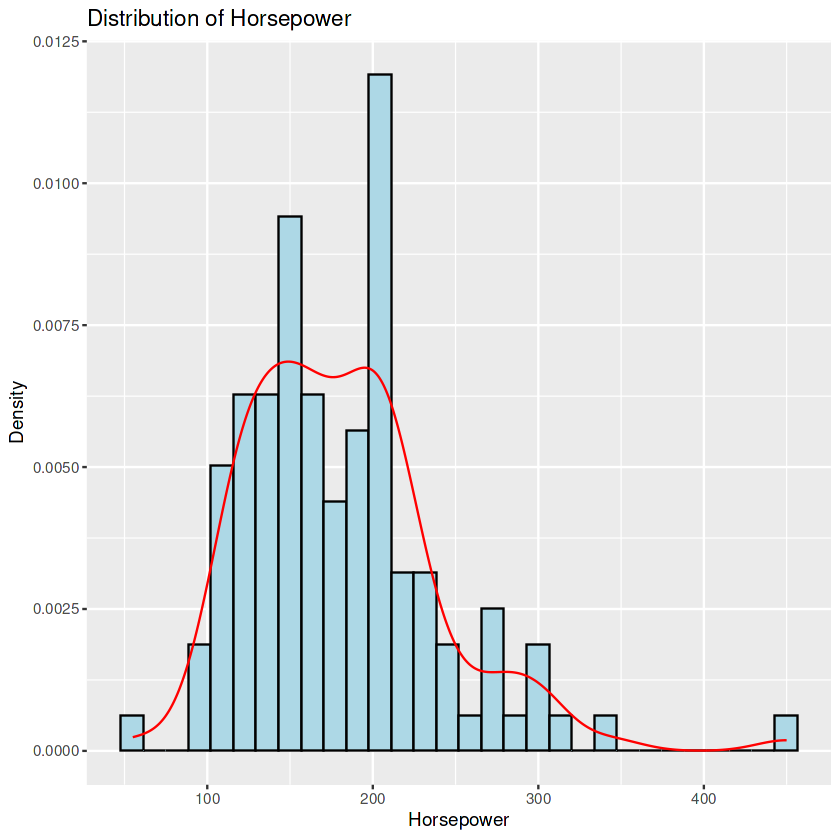

Warning message in ks.test(data$Horsepower, "pnorm", mean(data$Horsepower), sd(data$Horsepower)):
“ties should not be present for the Kolmogorov-Smirnov test”



	One-sample Kolmogorov-Smirnov test

data:  data$Horsepower
D = 0.098344, p-value = 0.2078
alternative hypothesis: two-sided



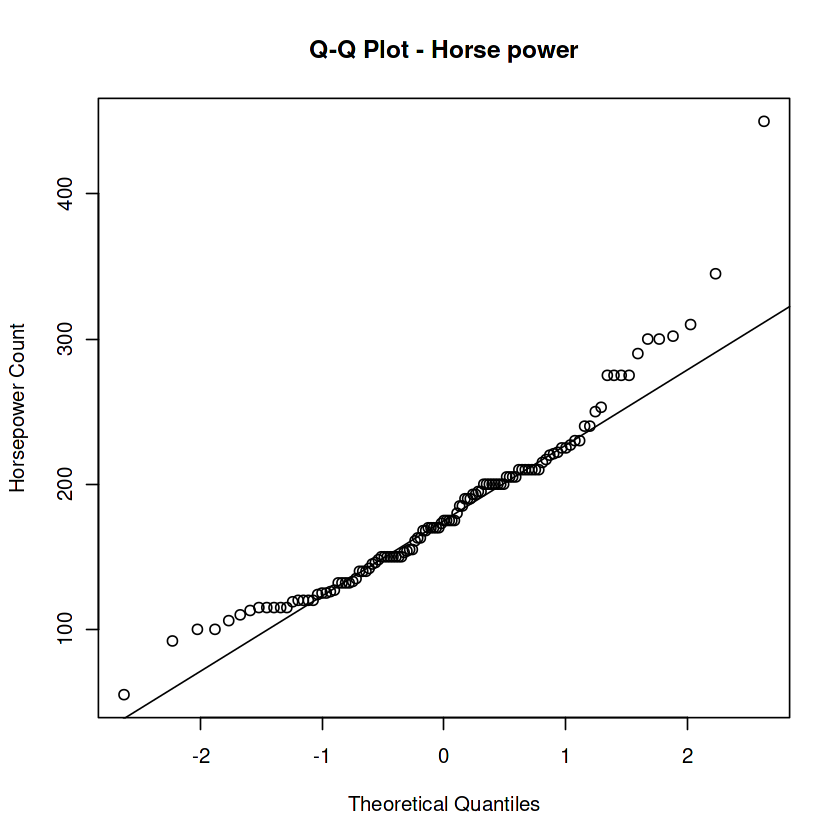

In [10]:
ggplot(data, aes(x = Horsepower)) +
  geom_histogram(aes(y = ..density..), bins = 30, fill = "lightblue", color = "black") +
  geom_density(color = "red") +
  xlab("Horsepower") +
  ylab("Density") +
  ggtitle("Distribution of Horsepower")

qqnorm(data$Horsepower, main = "Q-Q Plot - Horse power", xlab = "Theoretical Quantiles", ylab = "Horsepower Count")
qqline(data$Horsepower)


test_result <- ks.test(data$Horsepower, "pnorm", mean(data$Horsepower), sd(data$Horsepower))
print(test_result)


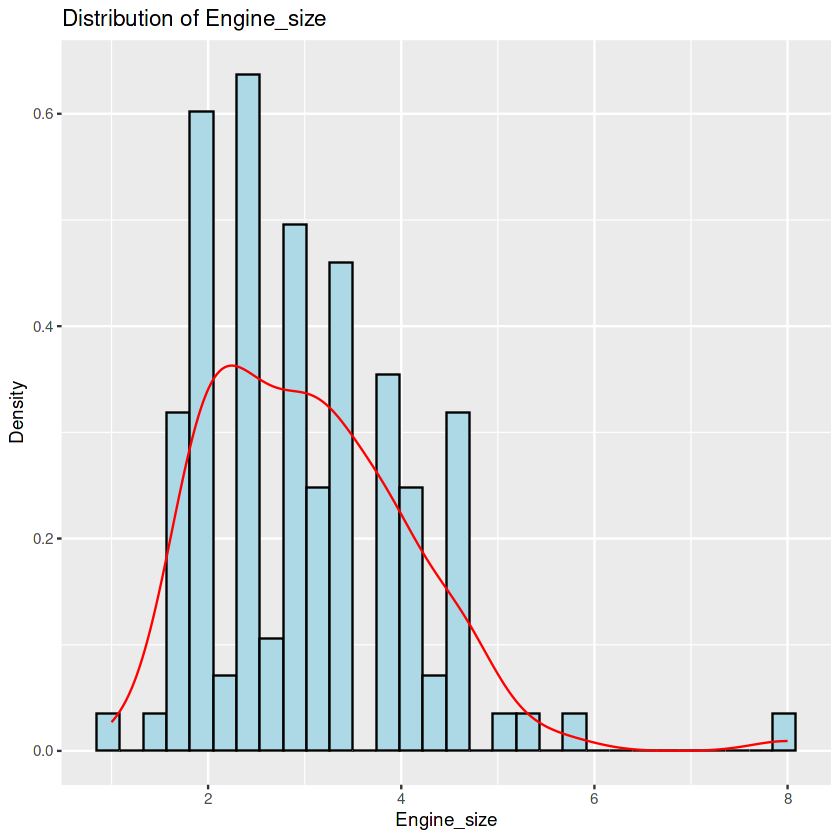

Warning message in ks.test(data$Engine_size, "pnorm", mean(data$Engine_size), sd(data$Engine_size)):
“ties should not be present for the Kolmogorov-Smirnov test”



	One-sample Kolmogorov-Smirnov test

data:  data$Engine_size
D = 0.10873, p-value = 0.1257
alternative hypothesis: two-sided



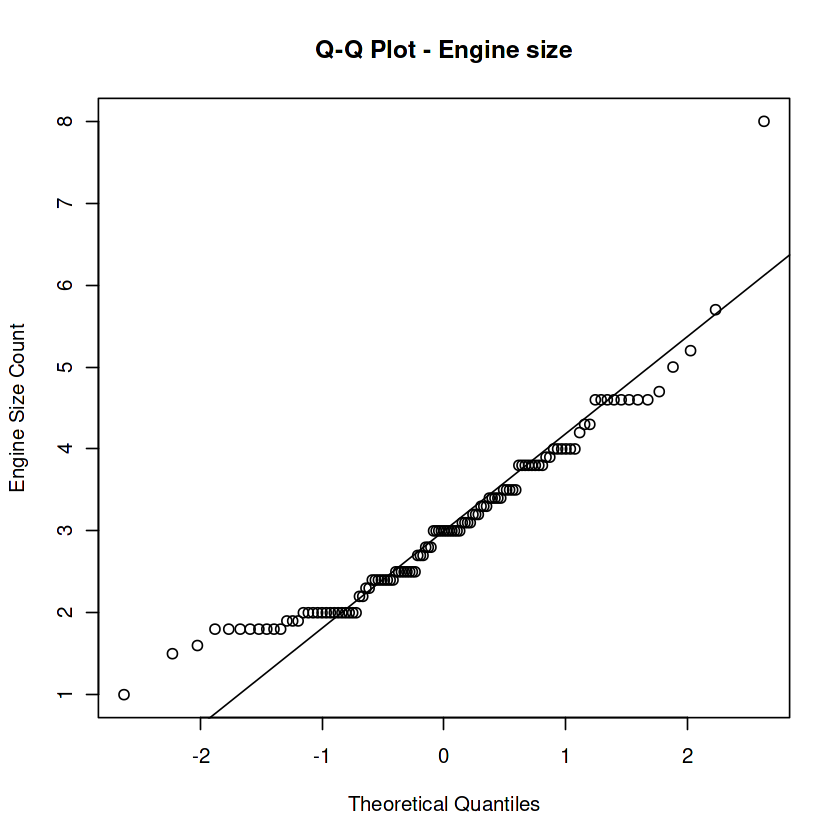

In [11]:

ggplot(data, aes(x = Engine_size)) +
  geom_histogram(aes(y = ..density..), bins = 30, fill = "lightblue", color = "black") +
  geom_density(color = "red") +
  xlab("Engine_size") +
  ylab("Density") +
  ggtitle("Distribution of Engine_size")


qqnorm(data$Engine_size, main = "Q-Q Plot - Engine size", xlab = "Theoretical Quantiles", ylab = "Engine Size Count")
qqline(data$Engine_size)


test_result <- ks.test(data$Engine_size, "pnorm", mean(data$Engine_size), sd(data$Engine_size))
print(test_result)



Call:
lm(formula = Horsepower ~ Engine_size, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-55.502 -18.089  -4.107  19.498 101.911 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   35.418      8.475   4.179 5.73e-05 ***
Engine_size   47.844      2.628  18.205  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.87 on 115 degrees of freedom
Multiple R-squared:  0.7424,	Adjusted R-squared:  0.7401 
F-statistic: 331.4 on 1 and 115 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


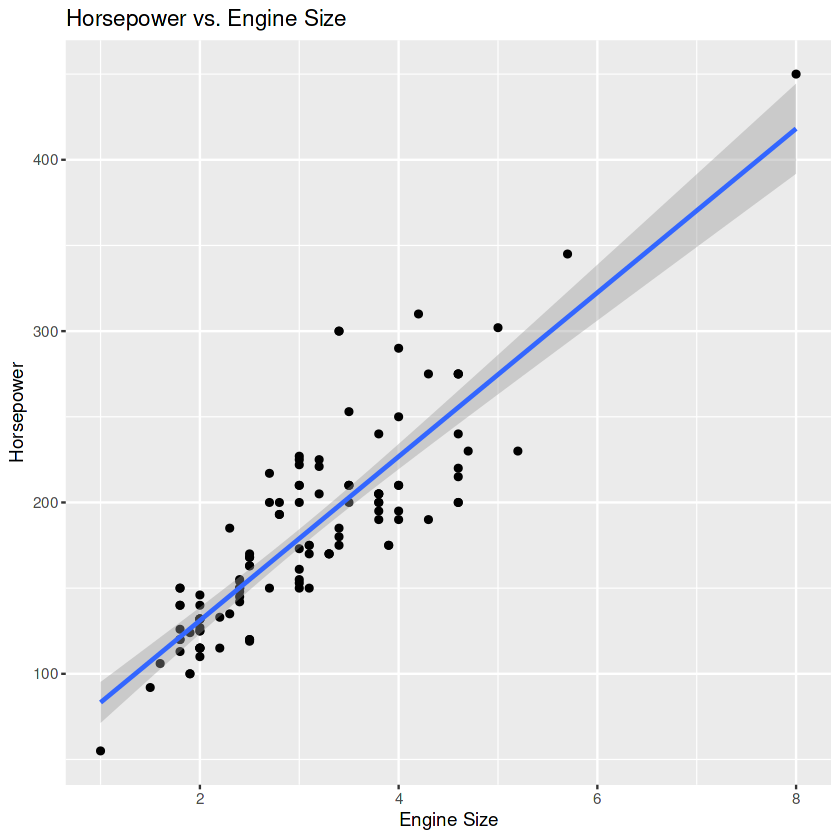

In [12]:

model <- lm(Horsepower ~ Engine_size, data=data)

summary(model)

data_subset <- data[, c("Horsepower", "Engine_size")]


ggplot(data_subset, aes(x = Engine_size, y = Horsepower)) +
  geom_point() +
  geom_smooth(method = "lm", se = TRUE) +
  labs(x = "Engine Size", y = "Horsepower") +
  ggtitle("Horsepower vs. Engine Size")

# Hipotez II
> # H1: Dodge araçlar Chevrolet marka araçlardan daha pahalıdır. 
> # H0: Dodge araçlar Chevrolet marka araçlardan daha pahalı değildir.

Manufacturer Model      Sales_in_thousands X__year_resale_value Vehicle_type
36 Dodge        Neon        76.034             7.750               Passenger   
37 Dodge        Avenger      4.734            12.545               Passenger   
38 Dodge        Stratus     71.186            10.185               Passenger   
40 Dodge        Viper        0.916            58.470               Passenger   
41 Dodge        Ram Pickup 227.061            15.060               Car         
42 Dodge        Ram Wagon   16.767            15.510               Car         
43 Dodge        Ram Van     31.038            13.425               Car         
44 Dodge        Dakota     111.313            11.260               Car         
46 Dodge        Caravan    181.749            12.025               Car         
   Price_in_thousands Engine_size Horsepower Wheelbase Width Length Curb_weight
36 12.640             2.0         132        105.0     74.4  174.4  2.567      
37 19.045             2.5         163        103.7     69.1  190.2  2.879      
38 20.230             2.5         168        108.0     71.0  186.0  3.058      
40 69.725             8.0         450         96.2     75.7  176.7  3.375      
41 19.460             5.2         230        138.7     79.3  224.2  4.470      
42 21.315             3.9         175        109.6     78.8  192.6  4.245      
43 18.575             3.9         175        127.2     78.8  208.5  4.298      
44 16.980             2.5         120        131.0     71.5  215.0  3.557      
46 19.565             2.4         150        113.3     76.8  186.3  3.533      
   Fuel_capacity Fuel_efficiency Latest_Launch Power_perf_factor
36 12.5          29              12/12/2011     52.08490        
37 15.9          24              7/1/2012       65.65051        
38 16.0          24              10/31/2011     67.87611        
40 19.0          16              8/7/2011      188.14432        
41 26.0          17              3/6/2012       90.21170        
42 32.0          15              1/6/2012       71.13529        
43 32.0          16              7/26/2012      70.07832        
44 22.0          19              11/25/2011     49.64500        
46 20.0          24              9/1/2011       61.22700

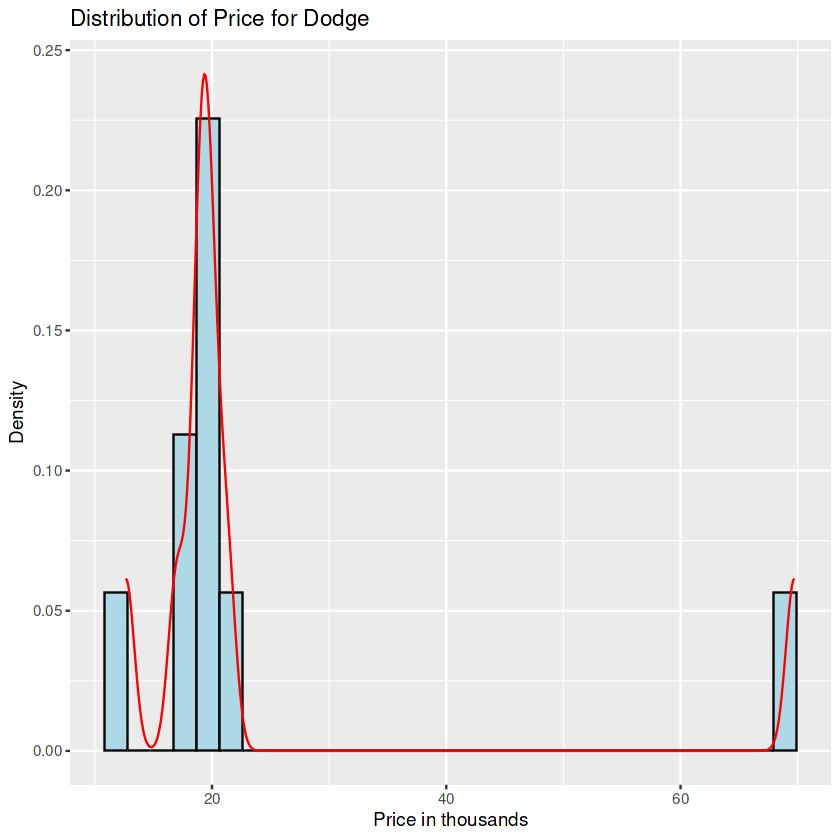


	One-sample Kolmogorov-Smirnov test

data:  filtered_data_dodge$Price_in_thousands
D = 0.45457, p-value = 0.03225
alternative hypothesis: two-sided



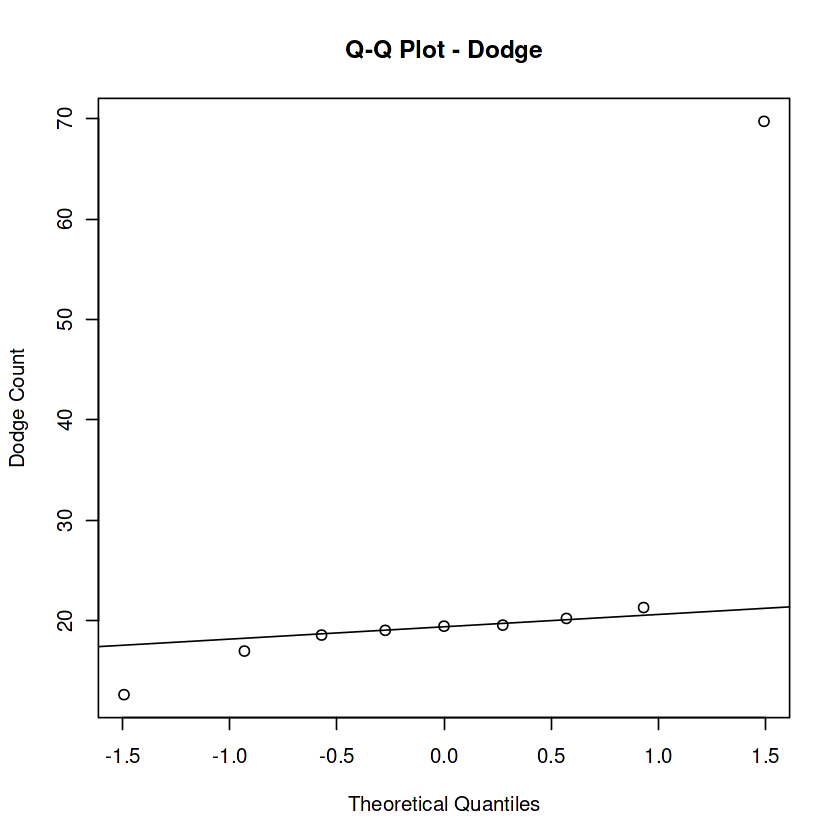

In [13]:

filtered_data_dodge <- subset(data, Manufacturer == "Dodge")
filtered_data_dodge
ggplot(filtered_data_dodge, aes(x = Price_in_thousands)) +
  geom_histogram(aes(y = ..density..), bins = 30, fill = "lightblue", color = "black") +
  geom_density(color = "red") +
  xlab("Price in thousands") +
  ylab("Density") +
  ggtitle("Distribution of Price for Dodge")


qqnorm(filtered_data_dodge$Price_in_thousands, main = "Q-Q Plot - Dodge", xlab = "Theoretical Quantiles", ylab = "Dodge Count")
qqline(filtered_data_dodge$Price_in_thousands)


test_result <- ks.test(filtered_data_dodge$Price_in_thousands, "pnorm", mean(filtered_data_dodge$Price_in_thousands), sd(filtered_data_dodge$Price_in_thousands))
print(test_result)


Manufacturer Model       Sales_in_thousands X__year_resale_value
20 Chevrolet    Cavalier    145.519             9.250              
21 Chevrolet    Malibu      135.126            11.225              
22 Chevrolet    Lumina       24.629            10.310              
23 Chevrolet    Monte Carlo  42.593            11.525              
24 Chevrolet    Camaro       26.402            13.025              
25 Chevrolet    Corvette     17.947            36.225              
26 Chevrolet    Prizm        32.299             9.125              
27 Chevrolet    Metro        21.855             5.160              
   Vehicle_type Price_in_thousands Engine_size Horsepower Wheelbase Width
20 Passenger    13.260             2.2         115        104.1     67.9 
21 Passenger    16.535             3.1         170        107.0     69.4 
22 Passenger    18.890             3.1         175        107.5     72.5 
23 Passenger    19.390             3.4         180        110.5     72.7 
24 Passenger    24.340             3.8         200        101.1     74.1 
25 Passenger    45.705             5.7         345        104.5     73.6 
26 Passenger    13.960             1.8         120         97.1     66.7 
27 Passenger     9.235             1.0          55         93.1     62.6 
   Length Curb_weight Fuel_capacity Fuel_efficiency Latest_Launch
20 180.9  2.676       14.3          27              8/17/2011    
21 190.4  3.051       15.0          25              3/19/2012    
22 200.9  3.330       16.6          25              5/24/2011    
23 197.9  3.340       17.0          27              12/22/2011   
24 193.2  3.500       16.8          25              10/23/2011   
25 179.7  3.210       19.1          22              5/12/2012    
26 174.3  2.398       13.2          33              9/11/2011    
27 149.4  1.895       10.3          45              4/13/2012    
   Power_perf_factor
20  46.36335        
21  67.31446        
22  69.99140        
23  72.03092        
24  81.11854        
25 141.14115        
26  48.29764        
27  23.27627

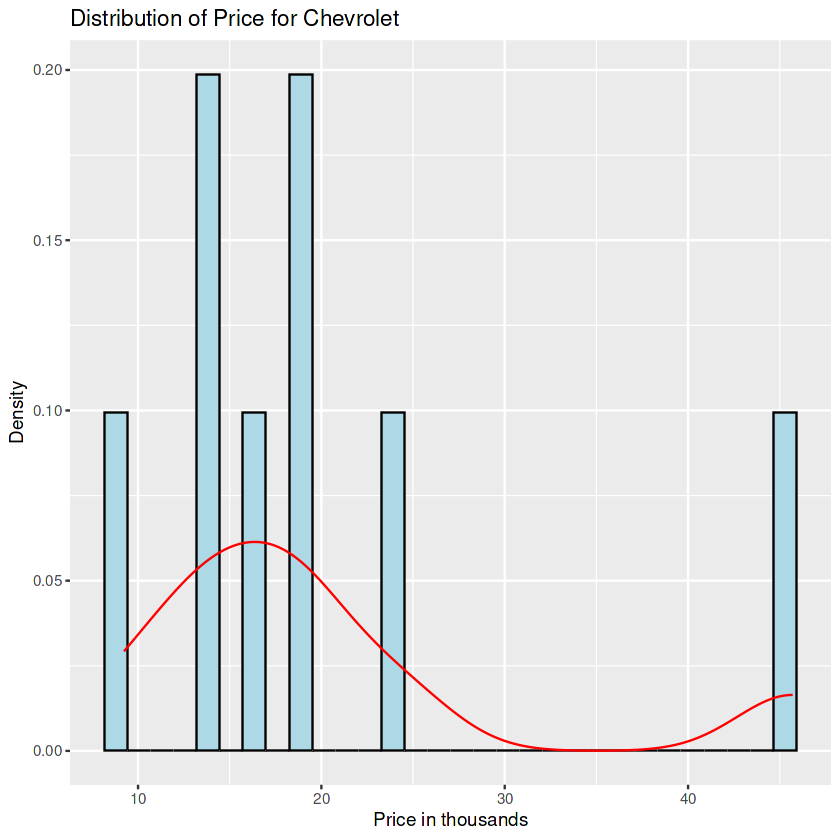


	One-sample Kolmogorov-Smirnov test

data:  filtered_data_chevrolet$Price_in_thousands
D = 0.27736, p-value = 0.4865
alternative hypothesis: two-sided



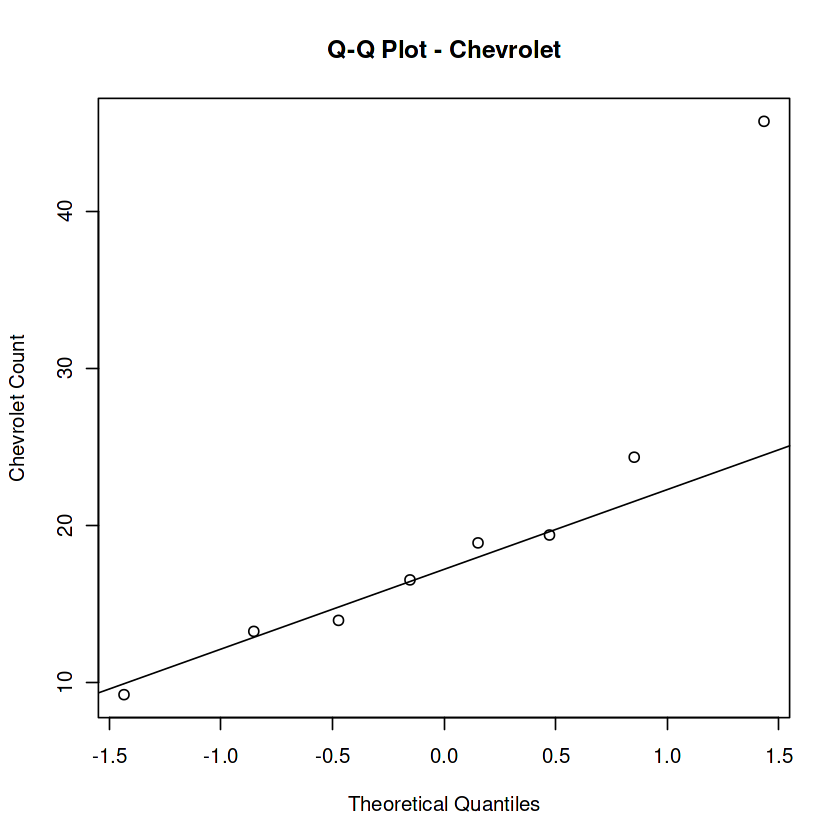

In [14]:
# Manufacturer-

filtered_data_chevrolet <- subset(data, Manufacturer == "Chevrolet")
filtered_data_chevrolet
ggplot(filtered_data_chevrolet, aes(x = Price_in_thousands)) +
  geom_histogram(aes(y = ..density..), bins = 30, fill = "lightblue", color = "black") +
  geom_density(color = "red") +
  xlab("Price in thousands") +
  ylab("Density") +
  ggtitle("Distribution of Price for Chevrolet")

# Q-Q grafiği
qqnorm(filtered_data_chevrolet$Price_in_thousands, main = "Q-Q Plot - Chevrolet", xlab = "Theoretical Quantiles", ylab = "Chevrolet Count")
qqline(filtered_data_chevrolet$Price_in_thousands)

# Kolmogorov-Smirnov testini uygulama
test_result <- ks.test(filtered_data_chevrolet$Price_in_thousands, "pnorm", mean(filtered_data_chevrolet$Price_in_thousands), sd(filtered_data_chevrolet$Price_in_thousands))
print(test_result)

In [15]:
#Point estimations


dodge_price <- data %>%
  filter(Manufacturer == "Dodge") %>%
  pull(Price_in_thousands)

chevrolet_price <- data %>%
  filter(Manufacturer == "Chevrolet") %>%
  pull(Price_in_thousands)

dodge_mean <- mean(dodge_price)
chevrolet_mean <- mean(chevrolet_price)

dodge_median <- median(dodge_price)
chevrolet_median <- median(chevrolet_price)


cat("Mean Price - Dodge:", dodge_mean, "\n")
cat("Mean Price - Chevrolet:", chevrolet_mean, "\n")
cat("Median Price - Dodge:", dodge_median, "\n")
cat("Median Price - Chevrolet:", chevrolet_median, "\n")

Mean Price - Dodge: 24.17056 
Mean Price - Chevrolet: 20.16437 
Median Price - Dodge: 19.46 
Median Price - Chevrolet: 17.7125 


In [16]:
#confidence interval


confidence_interval_dodge <- t.test(dodge_price)$conf.int
confidence_interval_chevrolet <- t.test(chevrolet_price)$conf.int

lower_bound_dodge <- confidence_interval_dodge[1]
upper_bound_dodge <- confidence_interval_dodge[2]

lower_bound_chevrolet <- confidence_interval_chevrolet[1]
upper_bound_chevrolet <- confidence_interval_chevrolet[2]


cat("Confidence interval for Dodge price: ", confidence_interval_dodge, "\n")
cat("Lower bound for Dodge price: ", lower_bound_dodge, "\n")
cat("Upper bound for Dodge price: ", upper_bound_dodge, "\n\n")

cat("Confidence interval for Chevrolet price: ", confidence_interval_chevrolet, "\n")
cat("Lower bound for Chevrolet price: ", lower_bound_chevrolet, "\n")
cat("Upper bound for Chevrolet price: ", upper_bound_chevrolet, "\n")

Confidence interval for Dodge price:  10.89981 37.4413 
Lower bound for Dodge price:  10.89981 
Upper bound for Dodge price:  37.4413 

Confidence interval for Chevrolet price:  10.73352 29.59523 
Lower bound for Chevrolet price:  10.73352 
Upper bound for Chevrolet price:  29.59523 


In [17]:
#ANOVA

anova_result1 <- aov(Price_in_thousands ~ Manufacturer, data=data)

summary(anova_result1)

anova_summary <- summary(anova_result1)


#Sonuç olarak, verilen çıktıya dayanarak gruplar arasında anlamlı bir fark olduğu
#ve hipotezin doğru olabileceği sonucuna varılabilir.
#Ancak, kesin bir doğruluk için hipotezin kendisini incelemek gerekmektedi

             Df Sum Sq Mean Sq F value   Pr(>F)    
Manufacturer 25  13624   545.0   5.166 3.34e-09 ***
Residuals    91   9600   105.5                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [18]:
#nonparametric
# Assuming you have two vectors of salaries: data_scientist_salaries and data_analyst_salaries

# Perform Mann-Whitney U test



result <- wilcox.test(dodge_price, chevrolet_price, alternative = "greater")

cat("Mann-Whitney U Test:\n")
cat("====================================\n")
cat("Null hypothesis: Price of dodge are equal to or lower than chevrolet\n")
cat("Alternative hypothesis: Price of dodge are higher than chevrolet\n")
cat("====================================\n")
cat("Test statistic:", result$statistic, "\n")
cat("p-value:", result$p.value, "\n")
dodge_price
chevrolet_price

Mann-Whitney U Test:
Null hypothesis: Price of dodge are equal to or lower than chevrolet
Alternative hypothesis: Price of dodge are higher than chevrolet
Test statistic: 46 
p-value: 0.1851913 


[1] 12.640 19.045 20.230 69.725 19.460 21.315 18.575 16.980 19.565

[1] 13.260 16.535 18.890 19.390 24.340 45.705 13.960  9.235

In [19]:
# Perform the one-tailed t-test
t_result <- t.test(dodge_price, chevrolet_price, alternative = "greater")

# Get the p-value from the t-test result
p_value <- t_result$p.value

# Set the significance level
significance_level <- 0.05

# Check if the p-value is less than the significance level
if (p_value < significance_level) {
  cat("Reject the null hypothesis. The average price of Dodge is significantly higher than the average price of Chevrolet")
} else {
  cat("Fail to reject the null hypothesis. There is not enough evidence to conclude that the average price of Dodge is higher than the average price of Chevrolet")
}

# Print the p-value
cat("p-value:", p_value)

# Sadece markaya göre değerlendirme yapamıyoruz.
filtered_data_chevrolet
filtered_data_dodge

Fail to reject the null hypothesis. There is not enough evidence to conclude that the average price of Dodge is higher than the average price of Chevroletp-value: 0.2881826

Manufacturer Model       Sales_in_thousands X__year_resale_value
20 Chevrolet    Cavalier    145.519             9.250              
21 Chevrolet    Malibu      135.126            11.225              
22 Chevrolet    Lumina       24.629            10.310              
23 Chevrolet    Monte Carlo  42.593            11.525              
24 Chevrolet    Camaro       26.402            13.025              
25 Chevrolet    Corvette     17.947            36.225              
26 Chevrolet    Prizm        32.299             9.125              
27 Chevrolet    Metro        21.855             5.160              
   Vehicle_type Price_in_thousands Engine_size Horsepower Wheelbase Width
20 Passenger    13.260             2.2         115        104.1     67.9 
21 Passenger    16.535             3.1         170        107.0     69.4 
22 Passenger    18.890             3.1         175        107.5     72.5 
23 Passenger    19.390             3.4         180        110.5     72.7 
24 Passenger    24.340             3.8         200        101.1     74.1 
25 Passenger    45.705             5.7         345        104.5     73.6 
26 Passenger    13.960             1.8         120         97.1     66.7 
27 Passenger     9.235             1.0          55         93.1     62.6 
   Length Curb_weight Fuel_capacity Fuel_efficiency Latest_Launch
20 180.9  2.676       14.3          27              8/17/2011    
21 190.4  3.051       15.0          25              3/19/2012    
22 200.9  3.330       16.6          25              5/24/2011    
23 197.9  3.340       17.0          27              12/22/2011   
24 193.2  3.500       16.8          25              10/23/2011   
25 179.7  3.210       19.1          22              5/12/2012    
26 174.3  2.398       13.2          33              9/11/2011    
27 149.4  1.895       10.3          45              4/13/2012    
   Power_perf_factor
20  46.36335        
21  67.31446        
22  69.99140        
23  72.03092        
24  81.11854        
25 141.14115        
26  48.29764        
27  23.27627

Manufacturer Model      Sales_in_thousands X__year_resale_value Vehicle_type
36 Dodge        Neon        76.034             7.750               Passenger   
37 Dodge        Avenger      4.734            12.545               Passenger   
38 Dodge        Stratus     71.186            10.185               Passenger   
40 Dodge        Viper        0.916            58.470               Passenger   
41 Dodge        Ram Pickup 227.061            15.060               Car         
42 Dodge        Ram Wagon   16.767            15.510               Car         
43 Dodge        Ram Van     31.038            13.425               Car         
44 Dodge        Dakota     111.313            11.260               Car         
46 Dodge        Caravan    181.749            12.025               Car         
   Price_in_thousands Engine_size Horsepower Wheelbase Width Length Curb_weight
36 12.640             2.0         132        105.0     74.4  174.4  2.567      
37 19.045             2.5         163        103.7     69.1  190.2  2.879      
38 20.230             2.5         168        108.0     71.0  186.0  3.058      
40 69.725             8.0         450         96.2     75.7  176.7  3.375      
41 19.460             5.2         230        138.7     79.3  224.2  4.470      
42 21.315             3.9         175        109.6     78.8  192.6  4.245      
43 18.575             3.9         175        127.2     78.8  208.5  4.298      
44 16.980             2.5         120        131.0     71.5  215.0  3.557      
46 19.565             2.4         150        113.3     76.8  186.3  3.533      
   Fuel_capacity Fuel_efficiency Latest_Launch Power_perf_factor
36 12.5          29              12/12/2011     52.08490        
37 15.9          24              7/1/2012       65.65051        
38 16.0          24              10/31/2011     67.87611        
40 19.0          16              8/7/2011      188.14432        
41 26.0          17              3/6/2012       90.21170        
42 32.0          15              1/6/2012       71.13529        
43 32.0          16              7/26/2012      70.07832        
44 22.0          19              11/25/2011     49.64500        
46 20.0          24              9/1/2011       61.22700

Manufacturer Model       Sales_in_thousands X__year_resale_value
20 Chevrolet    Cavalier    145.519             9.250              
21 Chevrolet    Malibu      135.126            11.225              
22 Chevrolet    Lumina       24.629            10.310              
23 Chevrolet    Monte Carlo  42.593            11.525              
24 Chevrolet    Camaro       26.402            13.025              
25 Chevrolet    Corvette     17.947            36.225              
26 Chevrolet    Prizm        32.299             9.125              
27 Chevrolet    Metro        21.855             5.160              
   Vehicle_type Price_in_thousands Engine_size Horsepower Wheelbase Width
20 Passenger    13.260             2.2         115        104.1     67.9 
21 Passenger    16.535             3.1         170        107.0     69.4 
22 Passenger    18.890             3.1         175        107.5     72.5 
23 Passenger    19.390             3.4         180        110.5     72.7 
24 Passenger    24.340             3.8         200        101.1     74.1 
25 Passenger    45.705             5.7         345        104.5     73.6 
26 Passenger    13.960             1.8         120         97.1     66.7 
27 Passenger     9.235             1.0          55         93.1     62.6 
   Length Curb_weight Fuel_capacity Fuel_efficiency Latest_Launch
20 180.9  2.676       14.3          27              8/17/2011    
21 190.4  3.051       15.0          25              3/19/2012    
22 200.9  3.330       16.6          25              5/24/2011    
23 197.9  3.340       17.0          27              12/22/2011   
24 193.2  3.500       16.8          25              10/23/2011   
25 179.7  3.210       19.1          22              5/12/2012    
26 174.3  2.398       13.2          33              9/11/2011    
27 149.4  1.895       10.3          45              4/13/2012    
   Power_perf_factor
20  46.36335        
21  67.31446        
22  69.99140        
23  72.03092        
24  81.11854        
25 141.14115        
26  48.29764        
27  23.27627

Manufacturer Model      Sales_in_thousands X__year_resale_value Vehicle_type
36 Dodge        Neon        76.034             7.750               Passenger   
37 Dodge        Avenger      4.734            12.545               Passenger   
38 Dodge        Stratus     71.186            10.185               Passenger   
40 Dodge        Viper        0.916            58.470               Passenger   
41 Dodge        Ram Pickup 227.061            15.060               Car         
42 Dodge        Ram Wagon   16.767            15.510               Car         
43 Dodge        Ram Van     31.038            13.425               Car         
44 Dodge        Dakota     111.313            11.260               Car         
46 Dodge        Caravan    181.749            12.025               Car         
   Price_in_thousands Engine_size Horsepower Wheelbase Width Length Curb_weight
36 12.640             2.0         132        105.0     74.4  174.4  2.567      
37 19.045             2.5         163        103.7     69.1  190.2  2.879      
38 20.230             2.5         168        108.0     71.0  186.0  3.058      
40 69.725             8.0         450         96.2     75.7  176.7  3.375      
41 19.460             5.2         230        138.7     79.3  224.2  4.470      
42 21.315             3.9         175        109.6     78.8  192.6  4.245      
43 18.575             3.9         175        127.2     78.8  208.5  4.298      
44 16.980             2.5         120        131.0     71.5  215.0  3.557      
46 19.565             2.4         150        113.3     76.8  186.3  3.533      
   Fuel_capacity Fuel_efficiency Latest_Launch Power_perf_factor
36 12.5          29              12/12/2011     52.08490        
37 15.9          24              7/1/2012       65.65051        
38 16.0          24              10/31/2011     67.87611        
40 19.0          16              8/7/2011      188.14432        
41 26.0          17              3/6/2012       90.21170        
42 32.0          15              1/6/2012       71.13529        
43 32.0          16              7/26/2012      70.07832        
44 22.0          19              11/25/2011     49.64500        
46 20.0          24              9/1/2011       61.22700

 Manufacturer          Model           Sales_in_thousands X__year_resale_value
 Length:8           Length:8           Min.   : 17.95     Min.   : 5.160      
 Class :character   Class :character   1st Qu.: 23.94     1st Qu.: 9.219      
 Mode  :character   Mode  :character   Median : 29.35     Median :10.768      
                                       Mean   : 55.80     Mean   :13.231      
                                       3rd Qu.: 65.73     3rd Qu.:11.900      
                                       Max.   :145.52     Max.   :36.225      
 Vehicle_type       Price_in_thousands  Engine_size      Horsepower   
 Length:8           Min.   : 9.235     Min.   :1.000   Min.   : 55.0  
 Class :character   1st Qu.:13.785     1st Qu.:2.100   1st Qu.:118.8  
 Mode  :character   Median :17.712     Median :3.100   Median :172.5  
                    Mean   :20.164     Mean   :3.013   Mean   :170.0  
                    3rd Qu.:20.628     3rd Qu.:3.500   3rd Qu.:185.0  
                    M

 Manufacturer          Model           Sales_in_thousands X__year_resale_value
 Length:9           Length:9           Min.   :  0.916    Min.   : 7.75       
 Class :character   Class :character   1st Qu.: 16.767    1st Qu.:11.26       
 Mode  :character   Mode  :character   Median : 71.186    Median :12.54       
                                       Mean   : 80.089    Mean   :17.36       
                                       3rd Qu.:111.313    3rd Qu.:15.06       
                                       Max.   :227.061    Max.   :58.47       
 Vehicle_type       Price_in_thousands  Engine_size      Horsepower   
 Length:9           Min.   :12.64      Min.   :2.000   Min.   :120.0  
 Class :character   1st Qu.:18.57      1st Qu.:2.500   1st Qu.:150.0  
 Mode  :character   Median :19.46      Median :2.500   Median :168.0  
                    Mean   :24.17      Mean   :3.656   Mean   :195.9  
                    3rd Qu.:20.23      3rd Qu.:3.900   3rd Qu.:175.0  
                    M

Mean             Median Standard Deviation             Length 
          20.16437           17.71250           11.28065            8.00000 
           Maximum            Minimum 
          45.70500            9.23500

Mean             Median Standard Deviation             Length 
          24.17056           19.46000           17.26459            9.00000 
           Maximum            Minimum 
          69.72500           12.64000

Standard Deviation 
          7.001792

Mean 
0.572165

Mean 
0.2836051

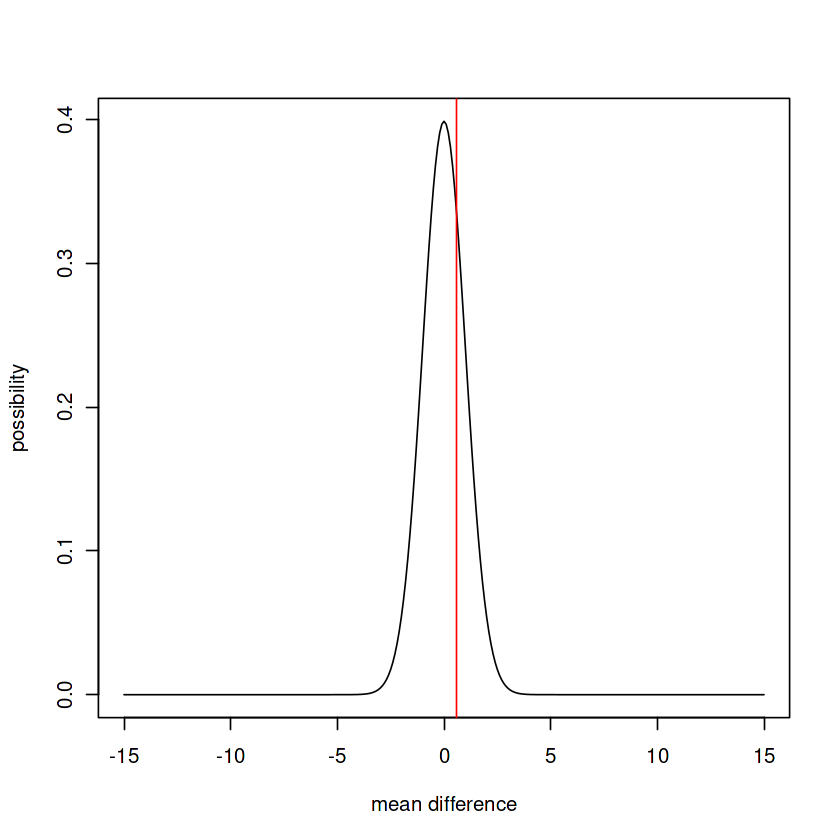

In [20]:
chevrolet <- subset(data,Manufacturer == "Chevrolet")
dodge <-subset(data, Manufacturer == "Dodge")

View(chevrolet)
View(dodge)

summary(chevrolet)
summary(dodge)

stat <- function(x) {
  data <- c("Mean" = mean(x, na.rm = TRUE),
            "Median" = median(x, na.rm = TRUE),
            "Standard Deviation" = sd(x, na.rm = TRUE),
            "Length" = length(x),
            "Maximum" = max(x, na.rm = TRUE),
            "Minimum" = min(x, na.rm = TRUE))
  return(data)
}


chevrolet_stat <- stat(chevrolet$Price_in_thousands)
chevrolet_stat
dodge_stat <- stat(dodge$Price_in_thousands)
dodge_stat

sd_dodge_chevrolet <- sqrt(chevrolet_stat[3]^2/chevrolet_stat[4] + dodge_stat[3]^2/dodge_stat[4])
sd_dodge_chevrolet
z_score <- (dodge_stat[1]-chevrolet_stat[1])/sd_dodge_chevrolet
z_score

p <- 1 - pnorm(z_score)
p

plot(x=seq(-15,15, by=0.1),y=dnorm(seq(-15,15,by=0.1),mean=0),type='l',xlab = 'mean difference',  ylab='possibility')

abline(v=z_score, col='red')
#this shows where the observation falls (z-score)

Manufacturer Model       Sales_in_thousands X__year_resale_value
20 Chevrolet    Cavalier    145.519             9.250              
21 Chevrolet    Malibu      135.126            11.225              
22 Chevrolet    Lumina       24.629            10.310              
23 Chevrolet    Monte Carlo  42.593            11.525              
24 Chevrolet    Camaro       26.402            13.025              
25 Chevrolet    Corvette     17.947            36.225              
26 Chevrolet    Prizm        32.299             9.125              
27 Chevrolet    Metro        21.855             5.160              
36 Dodge        Neon         76.034             7.750              
37 Dodge        Avenger       4.734            12.545              
38 Dodge        Stratus      71.186            10.185              
40 Dodge        Viper         0.916            58.470              
41 Dodge        Ram Pickup  227.061            15.060              
42 Dodge        Ram Wagon    16.767            15.510              
43 Dodge        Ram Van      31.038            13.425              
44 Dodge        Dakota      111.313            11.260              
46 Dodge        Caravan     181.749            12.025              
   Vehicle_type Price_in_thousands Engine_size Horsepower Wheelbase Width
20 Passenger    13.260             2.2         115        104.1     67.9 
21 Passenger    16.535             3.1         170        107.0     69.4 
22 Passenger    18.890             3.1         175        107.5     72.5 
23 Passenger    19.390             3.4         180        110.5     72.7 
24 Passenger    24.340             3.8         200        101.1     74.1 
25 Passenger    45.705             5.7         345        104.5     73.6 
26 Passenger    13.960             1.8         120         97.1     66.7 
27 Passenger     9.235             1.0          55         93.1     62.6 
36 Passenger    12.640             2.0         132        105.0     74.4 
37 Passenger    19.045             2.5         163        103.7     69.1 
38 Passenger    20.230             2.5         168        108.0     71.0 
40 Passenger    69.725             8.0         450         96.2     75.7 
41 Car          19.460             5.2         230        138.7     79.3 
42 Car          21.315             3.9         175        109.6     78.8 
43 Car          18.575             3.9         175        127.2     78.8 
44 Car          16.980             2.5         120        131.0     71.5 
46 Car          19.565             2.4         150        113.3     76.8 
   Length Curb_weight Fuel_capacity Fuel_efficiency Latest_Launch
20 180.9  2.676       14.3          27              8/17/2011    
21 190.4  3.051       15.0          25              3/19/2012    
22 200.9  3.330       16.6          25              5/24/2011    
23 197.9  3.340       17.0          27              12/22/2011   
24 193.2  3.500       16.8          25              10/23/2011   
25 179.7  3.210       19.1          22              5/12/2012    
26 174.3  2.398       13.2          33              9/11/2011    
27 149.4  1.895       10.3          45              4/13/2012    
36 174.4  2.567       12.5          29              12/12/2011   
37 190.2  2.879       15.9          24              7/1/2012     
38 186.0  3.058       16.0          24              10/31/2011   
40 176.7  3.375       19.0          16              8/7/2011     
41 224.2  4.470       26.0          17              3/6/2012     
42 192.6  4.245       32.0          15              1/6/2012     
43 208.5  4.298       32.0          16              7/26/2012    
44 215.0  3.557       22.0          19              11/25/2011   
46 186.3  3.533       20.0          24              9/1/2011     
   Power_perf_factor
20  46.36335        
21  67.31446        
22  69.99140        
23  72.03092        
24  81.11854        
25 141.14115        
26  48.29764        
27  23.27627        
36  52.08490        
37  65.65051        
38  67.87611        
40 188.

Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(N, "Set2"):
“minimal value for n is 3, returning requested palette with 3 different levels
”
Warning message in RColorBrewer::brewer.pal(N, "Set2"):
“minimal value for n is 3, returning requested palette with 3 different levels
”
Warning message in RColorBrewer::brewer.pal(N, "Set2"):
“minimal value for n is 3, returning requested palette with 3 different levels
”
Warning message in RColorBrewer::brewer.pal(N, "Set2"):
“minimal value for n is 3, returning requested palette with 3 different levels
”


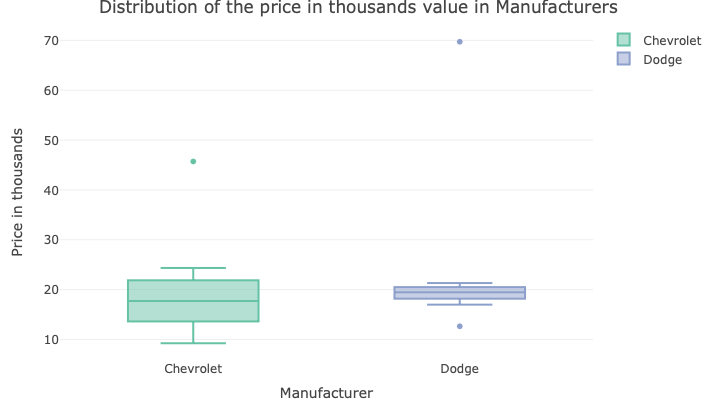

In [21]:
filtered_data <- subset(data, Manufacturer == "Chevrolet" | Manufacturer == "Dodge")
filtered_data
fig <- plot_ly(data = filtered_data, x = ~Manufacturer, color = ~Manufacturer, y = ~Price_in_thousands, type = "box") %>%
  layout(title = "Distribution of the price in thousands value in Manufacturers",
         xaxis = list(title = "Manufacturer"),
         yaxis = list(title = "Price in thousands"),
         width = 800,
         height = 400,
         template = "plotly_dark")
fig